In [232]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import T5Tokenizer, BartTokenizer

tokenizer_t5 = T5Tokenizer.from_pretrained('/workspace/lpf/LLM4Mol/ckpts/text_ckpts/molt5-base', model_max_length=512)
tokenizer_bart = BartTokenizer.from_pretrained('/workspace/lpf/LLM4Mol/ckpts/text_ckpts/bart', model_max_length=512)
t5_data = pd.read_csv('IUPAC__t5_t5_1_caption.txt',sep = '\t')
t5_data.columns = ['iupac','gt','out','score']
bart_data = pd.read_csv('IUPAC__bart_bart_1_caption.txt',sep = '\t')
bart_data.columns = ['iupac','gt','out','score']
train_data = pd.read_csv('train.csv')

In [240]:
# Tokenize the text in 'iupac' and 'gt' columns
iupac_tokens_t5 = [tokenizer_t5.tokenize(str(text)) for text in train_data['iupacname']]
gt_tokens_t5 = [tokenizer_t5.tokenize(text) for text in train_data['description']]

iupac_tokens_bart = [tokenizer_bart.tokenize(str(text)) for text in train_data['iupacname']]
gt_tokens_bart = [tokenizer_bart.tokenize(text) for text in train_data['description']]

# Flatten the list of tokens
iupac_tokens_flat_t5 = [token for sublist in iupac_tokens_t5 for token in sublist]
gt_tokens_flat_t5 = [token for sublist in gt_tokens_t5 for token in sublist]

iupac_tokens_flat_bart = [token for sublist in iupac_tokens_bart for token in sublist]
gt_tokens_flat_bart = [token for sublist in gt_tokens_bart for token in sublist]

# Count the frequency of each token
from collections import Counter
iupac_freq_t5 = Counter(iupac_tokens_flat_t5)
gt_freq_t5 = Counter(gt_tokens_flat_t5)

iupac_freq_bart = Counter(iupac_tokens_flat_bart)
gt_freq_bart = Counter(gt_tokens_flat_bart)

iupac_freq_t5_top_100 = iupac_freq_t5.most_common(100)
gt_freq_t5_top_100 = gt_freq_t5.most_common(100)
# Output the dictionaries
print("IUPAC Tokens Frequency T5:", iupac_freq_t5_top_100)
print("GT Tokens Frequency T5:", gt_freq_t5_top_100)

iupac_freq_bart_top_100 = iupac_freq_bart.most_common(100)
gt_freq_bart_top_100 = gt_freq_bart.most_common(100)
print("IUPAC Tokens Frequency BART:", iupac_freq_bart_top_100)
print("GT Tokens Frequency BART:", gt_freq_bart_top_100)

IUPAC Tokens Frequency T5: [('-', 183280), (',', 151155), ('o', 91784), ('R', 64508), (')', 63301), ('y', 60765), ('l', 56105), (']', 55052), ('(', 53232), ('S', 51685), ('[', 49620), ('a', 44785), ('-2', 42391), ('hydroxy', 38503), ('-3', 31414), ('x', 31210), ('methyl', 29104), ('4', 27078), ('3', 26756), ('oxy', 25303), ('d', 24417), ('an', 23877), ('2', 23020), ('i', 22524), ('5', 22301), ('e', 21697), ('6', 19304), ('t', 16827), ('-4', 16532), ('-6', 15639), ('-1', 15613), ('min', 15416), ('-5', 13739), ('th', 11497), ('en', 10392), ('prop', 8973), ('tri', 8491), ('4,5', 8238), ('Z', 8159), ('c', 7878), ('2-', 7263), ('7', 7085), ('s', 6859), ('E', 6639), ('phen', 6212), ('de', 5922), ('▁acid', 5840), ('phospho', 5832), ('14', 5679), ('9', 5452), ('▁[', 5432), ('ate', 5389), ('10', 5378), ('he', 5335), ('▁', 5156), ('car', 5069), ('11', 4930), ('▁(2', 4916), ('13', 4882), ('12', 4832), ('cycl', 4736), ('me', 4695), ('but', 4666), ('box', 4658), ('8', 4609), ('hydr', 4597), ('ace',

In [270]:
# List for IUPAC Tokens
#这些列表基于假设与化学密切相关的token包括官能团的名称、化合物类型以及化学命名中常用的前缀或后缀。未包括那些仅为字母、数字、标点或过于通用的token（如可能出现在各种上下文中的单个字母或常见词汇）
iupac_tokens_t5 = [
    'hydroxy', 'methyl', 'oxy','min', 'prop', 'tri', 'phen', '▁acid', 'phospho', 'ate', 'he', 'car', 'cycl', 'box', 'hydr', 'ace', 'ryl', 'lan', 'pyr', 'ent'
    #'one', 'tra', 'benz', 'phosphat', 'ium', 'mid', 'box'
]
# List for GT Tokens
gt_tokens_t5 = [
    '▁acid', 'ate', 'hydroxy', '▁group', 'metabol', '▁conjug', 'oxy', 'ives', 'methyl', 'ine', 'phosphat', 'cycl', 'lic', 'box', '▁carb', 'acy', 'one', 'pyr', '▁amino', '▁mono'
    #'▁groups','amin', 'fatty', 'al', 'ic', 'glu', 'lic', 'noi'
]
iupac_tokens_bart = [
    'yl', 'ox', 'hyd', 'roxy', 'oxy', 'ethyl', 'am', 'yd', 'ino', 'methyl', 'eth', 'ate', 'tri', 'en', 'osph', 'acet', 'box', 'prop', 'car', 'ph'
]
# GT Tokens Frequency BART - Chemistry-related tokens
gt_tokens_bart = [
    'yl', 'ate', 'ic', 'ide', 'os', 'ine', 'ite', 'ug', 'hyd', 'roxy', 'box', 'ol', 'oxy', 'osph', 'oy', 'one', 'ion', 'ro', 'ac', 'op'
]

In [271]:
# Filter the dictionaries
filtered_iupac_freq_t5 = {token: freq for token, freq in iupac_freq_t5.items() if token in iupac_tokens_t5}
filtered_gt_freq_t5 = {token: freq for token, freq in gt_freq_t5.items() if token in gt_tokens_t5}

filtered_iupac_freq_bart = {token: freq for token, freq in iupac_freq_bart.items() if token in iupac_tokens_bart}
filtered_gt_freq_bart = {token: freq for token, freq in gt_freq_bart.items() if token in gt_tokens_bart}

# Output the filtered dictionaries
print("Filtered IUPAC Frequencies T5:", filtered_iupac_freq_t5)
print("Filtered GT Frequencies T5:", filtered_gt_freq_t5)

print("Filtered IUPAC Frequencies BART:", filtered_iupac_freq_bart)
print("Filtered GT Frequencies BART:", filtered_gt_freq_bart)

Filtered IUPAC Frequencies T5: {'hydroxy': 38503, 'ent': 3420, 'tri': 8491, 'ate': 5389, 'methyl': 29104, 'hydr': 4597, 'cycl': 4736, 'phen': 6212, 'min': 15416, 'lan': 3650, 'oxy': 25303, 'phospho': 5832, 'ryl': 4249, 'ace': 4390, '▁acid': 5840, 'pyr': 3568, 'he': 5335, 'car': 5069, 'box': 4658, 'prop': 8973}
Filtered GT Frequencies T5: {'hydroxy': 15215, 'ate': 17148, '▁conjug': 11891, 'oxy': 11436, '▁acid': 27882, '▁carb': 5602, '▁group': 14423, 'cycl': 5882, 'methyl': 8714, 'metabol': 11991, 'one': 5560, 'pyr': 5538, 'phosphat': 6750, 'ives': 9204, 'ine': 7361, 'lic': 5882, '▁mono': 4981, 'box': 5606, '▁amino': 5208, 'acy': 5562}
Filtered IUPAC Frequencies BART: {'hyd': 29838, 'roxy': 29050, 'yl': 43874, 'ox': 29895, 'ate': 6600, 'am': 13797, 'ethyl': 19967, 'yd': 13673, 'methyl': 11268, 'acet': 4355, 'ino': 13285, 'eth': 7005, 'en': 6359, 'ph': 4303, 'osph': 6009, 'oxy': 21497, 'tri': 6484, 'car': 4457, 'box': 4661, 'prop': 4518}
Filtered GT Frequencies BART: {'oxy': 5977, 'hyd': 

In [322]:
import numpy as np
bart_data['iupac_tokens'] = bart_data['iupac'].apply(lambda x: tokenizer_bart.tokenize(x))
bart_data['out_tokens'] = bart_data['out'].apply(lambda x: tokenizer_bart.tokenize(x))

# 初始化共现矩阵
co_occurrence_matrix_bart = np.zeros((len(iupac_tokens_bart), len(gt_tokens_bart)))

# 创建token到索引的映射
bart_iupac_token_to_index = {token: idx for idx, token in enumerate(iupac_tokens_bart)}
bart_chem_token_to_index = {token: idx for idx, token in enumerate(gt_tokens_bart)}

# 计算映射矩阵
for _, row in bart_data.iterrows():
    for iupac_token in row['iupac_tokens']:
        if iupac_token in bart_iupac_token_to_index:
            for chem_token in row['out_tokens']:
                if chem_token in gt_tokens_bart:
                    row_idx = bart_iupac_token_to_index[iupac_token]
                    col_idx = bart_chem_token_to_index[chem_token]
                    co_occurrence_matrix_bart[row_idx, col_idx] += 1

In [291]:
import numpy as np
t5_data['iupac_tokens'] = t5_data['iupac'].apply(lambda x: tokenizer_t5.tokenize(x))
t5_data['out_tokens'] = t5_data['out'].apply(lambda x: tokenizer_t5.tokenize(x))

# 初始化共现矩阵
co_occurrence_matrix_t5 = np.zeros((len(iupac_tokens_t5), len(gt_tokens_t5)))

# 创建token到索引的映射
t5_iupac_token_to_index = {token: idx for idx, token in enumerate(iupac_tokens_t5)}
t5_chem_token_to_index = {token: idx for idx, token in enumerate(gt_tokens_t5)}

# 计算映射矩阵
for _, row in t5_data.iterrows():
    for iupac_token in row['iupac_tokens']:
        if iupac_token in t5_iupac_token_to_index:
            for chem_token in row['out_tokens']:
                if chem_token in gt_tokens_t5:
                    row_idx = t5_iupac_token_to_index[iupac_token]
                    col_idx = t5_chem_token_to_index[chem_token]
                    co_occurrence_matrix_t5[row_idx, col_idx] += 1

In [330]:
import numpy as np
import pandas as pd

# Assuming co_matrix_df is your DataFrame co-occurrence matrix
co_matrix_df_bart = pd.DataFrame(co_occurrence_matrix_bart,index=bart_iupac_token_to_index, columns=gt_tokens_bart)

# Summing the rows and columns
row_sums = co_matrix_df_bart.sum(axis=1)
col_sums = co_matrix_df_bart.sum(axis=0)

# Sorting the indices by their sums
sorted_row_indices = row_sums.sort_values(ascending=True).index
sorted_col_indices = col_sums.sort_values(ascending=False).index

# Reordering the matrix
reordered_matrix_bart = co_matrix_df_bart.loc[sorted_row_indices, sorted_col_indices]

# 找到DataFrame中的最大值
max_value = reordered_matrix_bart.max().max()

# 对整个DataFrame进行归一化
normalized_matrix_bart = reordered_matrix_bart / max_value

In [331]:
normalized_matrix_bart

,yl,os,ide,ite,ate,ic,ac,box,ine,oxy,op,hyd,ro,one,roxy,ol,osph,ug,ion,oy
ph,0.041001,0.017181,0.012367,0.057850,0.050048,0.031539,0.007885,0.033822,0.018675,0.018052,0.004565,0.018799,0.011288,0.002822,0.014483,0.011744,0.034112,0.019588,0.009711,0.015396
prop,0.087521,0.021289,0.029921,0.052040,0.032286,0.034901,0.016558,0.034029,0.032120,0.018841,0.009960,0.018343,0.015272,0.011993,0.015396,0.019422,0.014234,0.014815,0.014608,0.020500
en,0.072582,0.029008,0.034112,0.070507,0.029962,0.051210,0.012699,0.023322,0.028966,0.030336,0.017513,0.041955,0.022783,0.061252,0.038428,0.026850,0.005934,0.014151,0.010582,0.010956
osph,0.058348,0.023613,0.016434,0.077354,0.098975,0.036976,0.008922,0.039341,0.024567,0.023198,0.006598,0.027431,0.036104,0.003569,0.020874,0.015687,0.068805,0.033448,0.026850,0.024941
car,0.095697,0.040876,0.060630,0.047558,0.044777,0.049052,0.024567,0.076151,0.034942,0.020998,0.023986,0.020500,0.025646,0.018799,0.016143,0.014317,0.004897,0.025978,0.019339,0.007428
box,0.096568,0.041042,0.060879,0.049716,0.046147,0.052040,0.024567,0.080632,0.035689,0.021040,0.024360,0.021662,0.026725,0.018924,0.017139,0.014442,0.004938,0.026808,0.020666,0.007802
acet,0.172470,0.110636,0.082209,0.024526,0.028136,0.024318,0.076939,0.028551,0.022451,0.030792,0.031581,0.013695,0.011578,0.009545,0.010043,0.008134,0.006847,0.010292,0.010997,0.005727
ate,0.073038,0.029132,0.031332,0.090468,0.103581,0.068888,0.014193,0.083911,0.033282,0.020832,0.017720,0.035067,0.044819,0.020998,0.028966,0.025688,0.015106,0.043532,0.058140,0.017679
eth,0.105407,0.044653,0.051666,0.088932,0.058555,0.060339,0.027389,0.040627,0.052081,0.075528,0.022451,0.037889,0.029381,0.048720,0.031913,0.027970,0.023322,0.021206,0.014815,0.012657
tri,0.167697,0.132216,0.128107,0.054032,0.037142,0.056563,0.082790,0.022160,0.023654,0.040669,0.062995,0.034029,0.016890,0.040669,0.032245,0.031124,0.013238,0.010831,0.010292,0.011246


In [291]:
import numpy as np
import pandas as pd

# Assuming co_matrix_df is your DataFrame co-occurrence matrix
co_matrix_df_t5 = pd.DataFrame(co_occurrence_matrix_t5, index=t5_iupac_token_to_index, columns=gt_tokens_t5)

# Summing the rows and columns
row_sums = co_matrix_df_t5.sum(axis=1)
col_sums = co_matrix_df_t5.sum(axis=0)

# Sorting the indices by their sums
sorted_row_indices = row_sums.sort_values(ascending=True).index
sorted_col_indices = col_sums.sort_values(ascending=False).index

# Reordering the matrix
reordered_matrix_t5 = co_matrix_df_t5.loc[sorted_row_indices, sorted_col_indices]

# 找到DataFrame中的最大值
max_value = reordered_matrix_t5.max().max()

# 对整个DataFrame进行归一化
normalized_matrix_t5 = reordered_matrix_t5 / max_value

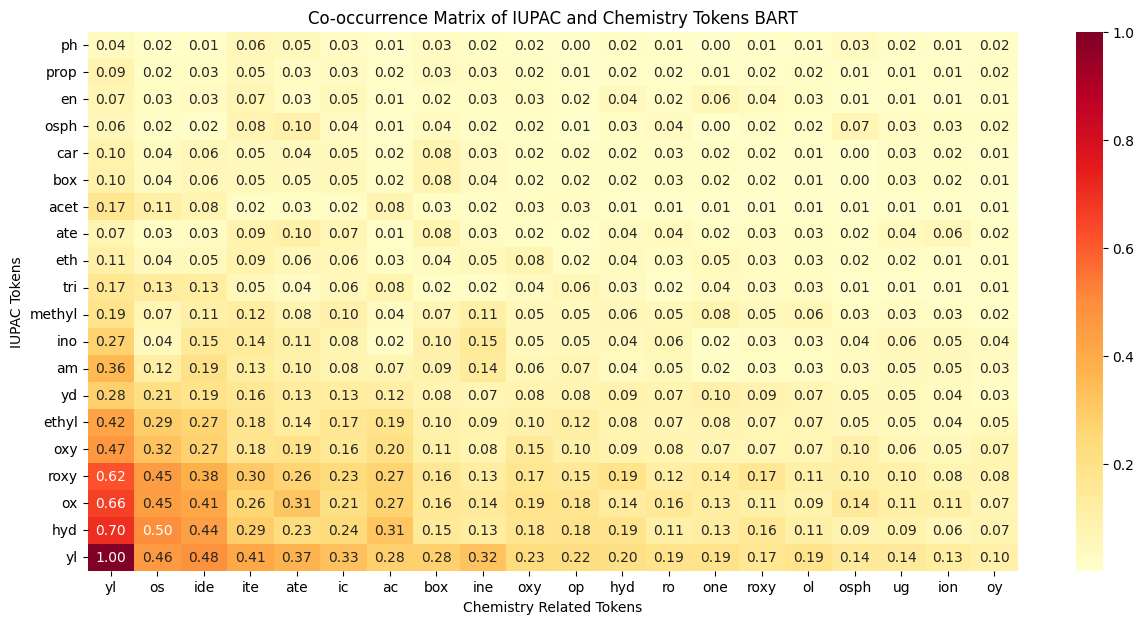

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 co_occurrence_matrix 是之前计算的共现矩阵
# top_20_smiles_tokens 和 chemistry_related_tokens 是对应的token列表

# 绘制热图
plt.figure(figsize=(15, 7))
sns.heatmap(normalized_matrix_bart, annot=True, fmt=".2f",
            xticklabels=normalized_matrix_bart.columns, yticklabels=normalized_matrix_bart.index,
            cmap="YlOrRd")  # 更换为YlOrRd色系
plt.xlabel("Chemistry Related Tokens")
plt.ylabel("IUPAC Tokens")
plt.title("Co-occurrence Matrix of IUPAC and Chemistry Tokens BART")
plt.show()

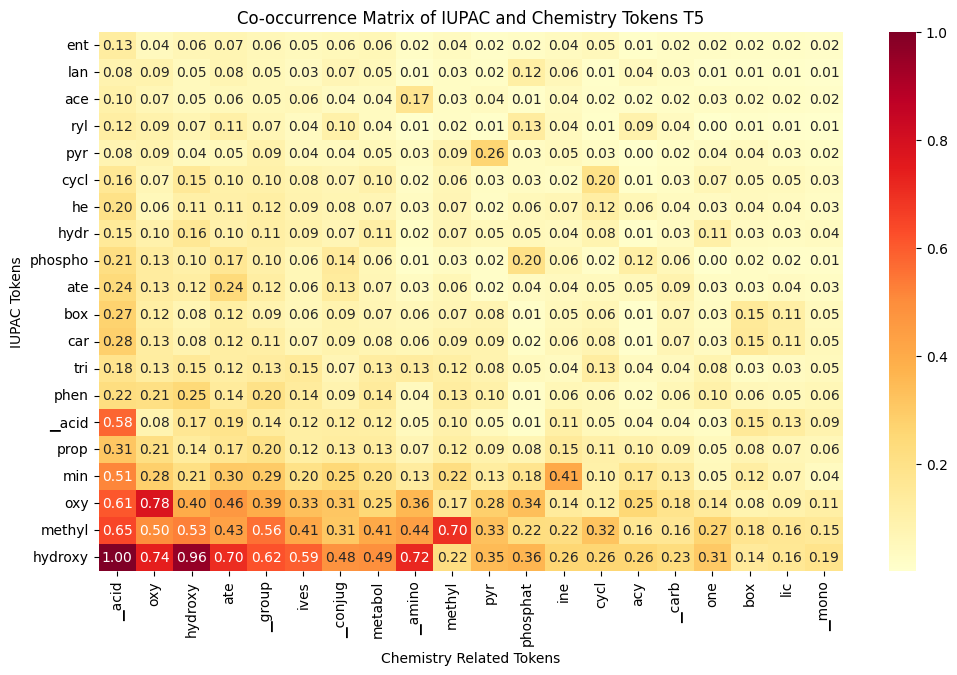

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 co_occurrence_matrix 是之前计算的共现矩阵
# top_20_smiles_tokens 和 chemistry_related_tokens 是对应的token列表

# 绘制热图
plt.figure(figsize=(12, 7))
sns.heatmap(normalized_matrix_t5, annot=True, fmt=".2f",
            xticklabels=normalized_matrix_t5.columns, yticklabels=normalized_matrix_t5.index,
            cmap="YlOrRd")  # 更换为YlOrRd色系
plt.xlabel("Chemistry Related Tokens")
plt.ylabel("IUPAC Tokens")
plt.title("Co-occurrence Matrix of IUPAC and Chemistry Tokens T5")
plt.show()

In [293]:
mean_value_t5 = normalized_matrix_t5.mean().mean()  
std_dev_t5 = normalized_matrix_t5.stack().std()  

mean_value_t5, std_dev_t5

(0.1260659527153558, 0.14675627180812917)

In [333]:
mean_value_bart= normalized_matrix_bart.mean().mean()  
std_dev_bart = normalized_matrix_bart.stack().std()  

mean_value_bart, std_dev_bart

(0.09521952940200026, 0.11571897656155608)

In [337]:
def get_specific_mapping_pairs(normalized_matrix_t5, Z_threshold):
    specific_mapping_pairs = []
    # 遍历矩阵中的每个元素
    for i in range(n):
        for j in range(m):
            mu_neighbor, sigma_neighbor = calculate_neighbor_stats(normalized_matrix_t5, i, j)
            if not np.isnan(mu_neighbor) and not np.isnan(sigma_neighbor):
                if normalized_matrix_t5.iloc[i, j] > mu_neighbor + Z_threshold * sigma_neighbor:
                    # 如果元素值超过邻域均值加上阈值乘以邻域标准差，添加到列表中
                    specific_mapping_pairs.append((normalized_matrix_t5.index[i], normalized_matrix_t5.columns[j], normalized_matrix_t5.iloc[i, j]))

    return specific_mapping_pairs 

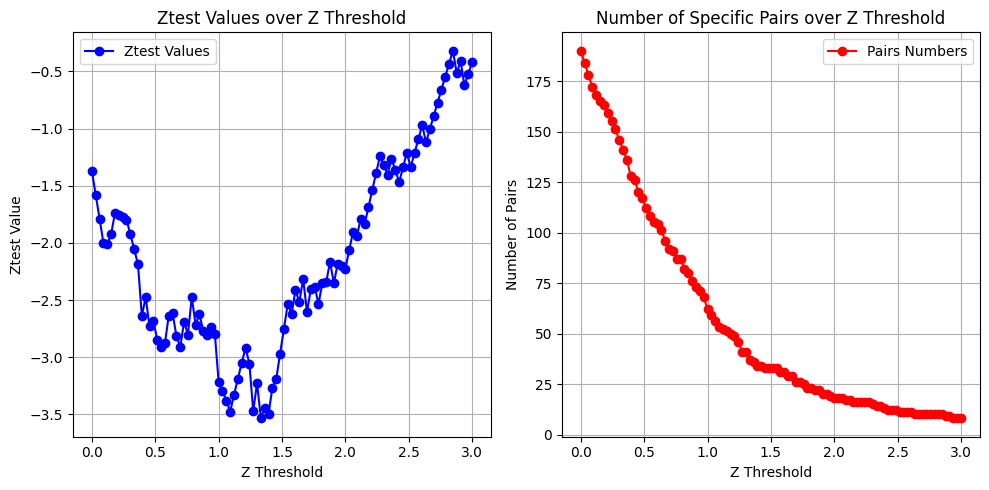

In [345]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def calculate_neighbor_stats(matrix, i, j):
    n, m = matrix.shape
    neighbors = []

    # 遍历邻域元素
    for x in range(max(0, i-1), min(n, i+2)):
        for y in range(max(0, j-1), min(m, j+2)):
            if (x != i or y != j):
                neighbors.append(matrix.iloc[x, y])
    
    neighbors = pd.Series(neighbors)
    return neighbors.mean(), neighbors.std()

def calculate_neighbor_stats_np(matrix, i, j):
    """针对 NumPy 矩阵计算指定元素邻域的均值和标准差"""
    n, m = matrix.shape
    neighbors = []

    # 遍历邻域元素
    for x in range(max(0, i-1), min(n, i+2)):
        for y in range(max(0, j-1), min(m, j+2)):
            if x != i or y != j:
                neighbors.append(matrix[x, y])

    neighbors = np.array(neighbors)
    if neighbors.size > 0:
        return np.mean(neighbors), np.std(neighbors)
    else:
        return np.nan, np.nan
    
# 给定的参数
n, m = 20, 20  # 矩阵的尺寸
mu, sigma = 0.095, 0.116 # 给定的均值和标准差

def get_matrix_lists(normalized_matrix_bart, n, m, mu, sigma):
    # 定义不同的阈值Z
    Z_values = np.linspace(0, 3, 100)  # 从0到3的阈值范围，100个点
    simulated_matrix = np.random.normal(mu, sigma, (n, m))
    Ztest_values = []
    Pairs_nums= []
    P_actual_avg_list = []
    P_expected_values = []
    for Z in Z_values:
        P_actual_list = []
        for i in range(n):
            for j in range(m):
                mu_neighbor, sigma_neighbor = calculate_neighbor_stats(normalized_matrix_bart, i, j)
                if sigma_neighbor != 0:
                    P_actual_list.append(normalized_matrix_bart.iloc[i, j] > mu_neighbor + Z * sigma_neighbor)

        P_actual_avg = np.mean(P_actual_list)
        P_actual_avg_list.append(P_actual_avg)
        P_expected_list = []
        for i in range(n):
            for j in range(m):
                mu_neighbor, sigma_neighbor = calculate_neighbor_stats_np(simulated_matrix, i, j)
                if not np.isnan(mu_neighbor) and not np.isnan(sigma_neighbor):
                    threshold = mu_neighbor + Z * sigma_neighbor
                    P_expected = 1 - norm.cdf(threshold, mu, sigma)
                    P_expected_list.append(P_expected)
            # 计算所有元素的平均预期概率
        P_expected_avg = np.mean(P_expected_list)
        P_expected_values.append(P_expected_avg)

        Ztest = (P_actual_avg - P_expected_avg) / np.sqrt(P_expected_avg * (1 - P_expected_avg) / (n * m))
        Ztest_values.append(Ztest)
        specific_mapping_pairs = get_specific_mapping_pairs(normalized_matrix_bart, Z)
        Pairs_nums.append(len(specific_mapping_pairs))
    return Ztest_values, Z_values, Pairs_nums

Ztest_values_bart, Z_values_bart, Pairs_nums_bart = get_matrix_lists(normalized_matrix_bart, n, m, mu, sigma)
# 创建图表并设置大小
plt.figure(figsize=(10, 5))

# 绘制第一条曲线（Ztest_values 随 Z_values 变化）
plt.subplot(1, 2, 1)  # 1行2列的第1个
plt.plot(Z_values_bart, Ztest_values_bart, marker='o', color='b', label='Ztest Values')
plt.xlabel('Z Threshold')
plt.ylabel('Ztest Value')
plt.title('Ztest Values over Z Threshold')
plt.grid(True)
plt.legend()

# 绘制第二条曲线（Pairs_nums 随 Z_values 变化）
plt.subplot(1, 2, 2)  # 1行2列的第2个
plt.plot(Z_values_bart, Pairs_nums_bart, marker='o', color='r', label='Pairs Numbers')
plt.xlabel('Z Threshold')
plt.ylabel('Number of Pairs')
plt.title('Number of Specific Pairs over Z Threshold')
plt.grid(True)
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

In [346]:
def top_5_Ztest_values(Z_values, Ztest_values, Pairs_nums):
    combined_list = list(zip(Z_values, Ztest_values, Pairs_nums))
    top_5 = sorted(combined_list, key=lambda x: x[1], reverse=True)[:5]
    return top_5

top_5_results = top_5_Ztest_values(Z_values_bart, Ztest_values_bart, Pairs_nums_bart)
top_5_results

[(2.8484848484848486, -0.31879350433312525, 10),
 (2.909090909090909, -0.4087667865278479, 9),
 (3.0, -0.4206753808987424, 8),
 (2.8181818181818183, -0.4321129057381348, 10),
 (2.878787878787879, -0.5161758955081517, 9)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


n, m = 20, 20 
mu, sigma = 0.126, 0.147  


Ztest_values_t5, Z_values_t5, Pairs_nums_t5 = get_matrix_lists(normalized_matrix_t5, n, m, mu, sigma)

[(2.787878787878788, 2.4047675956233023, 21),
 (2.757575757575758, 2.2505693939802756, 21),
 (2.7272727272727275, 2.0964042208575684, 21),
 (2.8181818181818183, 1.9774814355832921, 19),
 (2.6969696969696972, 1.9422369597875864, 21)]

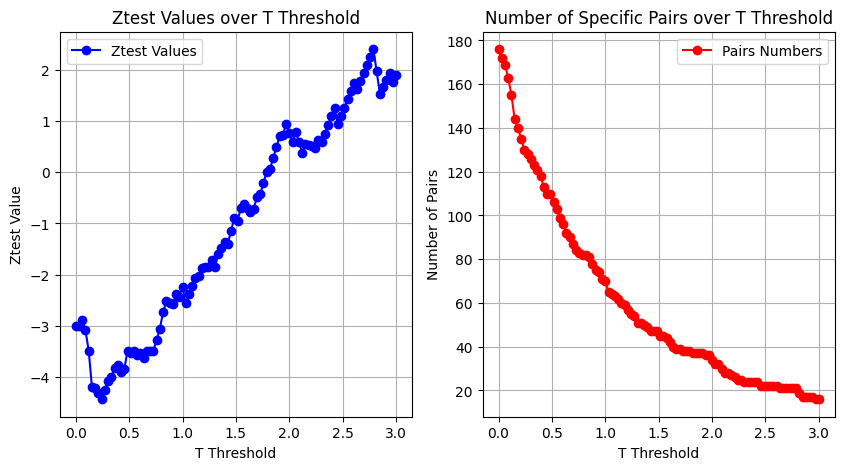

In [374]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)  
plt.plot(Z_values_t5, Ztest_values_t5, marker='o', color='b', label='Ztest Values')
plt.xlabel('T Threshold')
plt.ylabel('Ztest Value')
plt.title('Ztest Values over T Threshold')
plt.grid(True)
plt.legend()


plt.subplot(1, 2, 2) 
plt.plot(Z_values_t5, Pairs_nums_t5, marker='o', color='r', label='Pairs Numbers')
plt.xlabel('T Threshold')
plt.ylabel('Number of Pairs')
plt.title('Number of Specific Pairs over T Threshold')
plt.grid(True)
plt.legend()

top_5_results_t5 = top_5_Ztest_values(Z_values_t5, Ztest_values_t5, Pairs_nums_t5)
top_5_results_t5

In [351]:
n, m = normalized_matrix_t5.shape 


Z_threshold = 2.787878787878788


def get_specific_mapping_pairs(normalized_matrix_t5, Z_threshold):
    specific_mapping_pairs = []
    n, m = normalized_matrix_t5.shape  

    for i in range(n):
        for j in range(m):

            if normalized_matrix_t5.index[i] != normalized_matrix_t5.columns[j]:
                mu_neighbor, sigma_neighbor = calculate_neighbor_stats(normalized_matrix_t5, i, j)
                if not np.isnan(mu_neighbor) and not np.isnan(sigma_neighbor):
                    if normalized_matrix_t5.iloc[i, j] > mu_neighbor + Z_threshold * sigma_neighbor:
                  
                        specific_mapping_pairs.append((normalized_matrix_t5.index[i], normalized_matrix_t5.columns[j], normalized_matrix_t5.iloc[i, j]))

    return specific_mapping_pairs


pairs_t5 = get_specific_mapping_pairs(normalized_matrix_t5, Z_threshold)
pairs_t5

[('ent', 'methyl', 0.04049625468164794),
 ('lan', 'phosphat', 0.1164559925093633),
 ('ace', '▁amino', 0.1742743445692884),
 ('ryl', '▁acid', 0.12219101123595505),
 ('ryl', 'ate', 0.10849719101123595),
 ('ryl', '▁conjug', 0.10088951310861423),
 ('ryl', 'acy', 0.09316479400749064),
 ('cycl', 'hydroxy', 0.15086610486891386),
 ('cycl', 'one', 0.0676498127340824),
 ('hydr', 'one', 0.10802902621722846),
 ('phospho', 'phosphat', 0.20353464419475656),
 ('tri', 'cycl', 0.1262874531835206),
 ('phen', '▁group', 0.1999063670411985),
 ('min', 'ine', 0.4070692883895131),
 ('hydroxy', '▁acid', 1.0),
 ('hydroxy', '▁mono', 0.18808520599250936)]

In [ ]:
def generate_pattern_groups_double_pass(specific_mapping_pairs, prioritize_initial_token=True):
    """
    根据特异性映射对列表生成模式组，两次合并：先以一个token合并，再以另一个token合并。

    :param specific_mapping_pairs: 包含 (初始token, 映射token, 映射频率) 的列表
    :param prioritize_initial_token: 是否优先以初始token为合并依据
    :return: 生成的模式组
    """
    # 第一次合并：根据 prioritize_initial_token 选择合并依据
    first_pass_groups = {}
    for initial_token, mapped_token, _ in specific_mapping_pairs:
        key_token = initial_token if prioritize_initial_token else mapped_token
        value_token = mapped_token if prioritize_initial_token else initial_token

        if key_token in first_pass_groups:
            first_pass_groups[key_token].add(value_token)
        else:
            first_pass_groups[key_token] = {value_token}
    #print(first_pass_groups)
    return first_pass_groups

def merge_groups_based_on_exact_mapped_tokens(groups):
    """
    根据完全相同的映射token合并组。

    :param groups: 第一次合并后的模式组，格式为 {initial_token: {mapped_tokens}}
    :return: 根据映射token合并后的模式组
    """
    merged_groups = {}
    mapped_tokens_to_initial_tokens = {}

    # 创建映射token集合到初始token的映射
    for initial_token, mapped_tokens in groups.items():
        mapped_tokens_key = frozenset(mapped_tokens)
        if mapped_tokens_key not in mapped_tokens_to_initial_tokens:
            mapped_tokens_to_initial_tokens[mapped_tokens_key] = set()
        mapped_tokens_to_initial_tokens[mapped_tokens_key].add(initial_token)

    # 根据映射token集合合并初始token
    for mapped_tokens, initial_tokens in mapped_tokens_to_initial_tokens.items():
        merged_group_key = frozenset(initial_tokens)
        merged_groups[merged_group_key] = mapped_tokens

    return merged_groups

pattern_groups = generate_pattern_groups_double_pass(pairs_t5, prioritize_initial_token=True)
print(pattern_groups)
pattern_groups = merge_groups_based_on_exact_mapped_tokens(pattern_groups)
pattern_groups

{'ent': {'methyl'}, 'lan': {'phosphat'}, 'ace': {'▁amino'}, 'ryl': {'acy', '▁acid', 'ate', '▁conjug'}, 'cycl': {'one', 'hydroxy'}, 'hydr': {'one'}, 'phospho': {'phosphat'}, 'tri': {'cycl'}, 'phen': {'▁group'}, 'min': {'ine'}, 'hydroxy': {'▁acid', '▁mono'}}


{frozenset({'ent'}): frozenset({'methyl'}),
 frozenset({'lan', 'phospho'}): frozenset({'phosphat'}),
 frozenset({'ace'}): frozenset({'▁amino'}),
 frozenset({'ryl'}): frozenset({'acy', 'ate', '▁acid', '▁conjug'}),
 frozenset({'cycl'}): frozenset({'hydroxy', 'one'}),
 frozenset({'hydr'}): frozenset({'one'}),
 frozenset({'tri'}): frozenset({'cycl'}),
 frozenset({'phen'}): frozenset({'▁group'}),
 frozenset({'min'}): frozenset({'ine'}),
 frozenset({'hydroxy'}): frozenset({'▁acid', '▁mono'})}

In [96]:
# 提取唯一标记
unique_tokens_train = set(token for sublist in iupac_cap_train['iupac_tokens'] for token in sublist)
unique_tokens_test = set(token for sublist in molcap_data['iupac_tokens'] for token in sublist)

# 计算交集和并集
intersection = unique_tokens_train.intersection(unique_tokens_test)
union = unique_tokens_train.union(unique_tokens_test)

# 计算 Jaccard 相似度
jaccard_similarity = len(intersection) / len(union)

print(f"训练集与测试集的Jaccard 相似度: {jaccard_similarity}")

训练集与测试集的Jaccard 相似度: 0.682716049382716


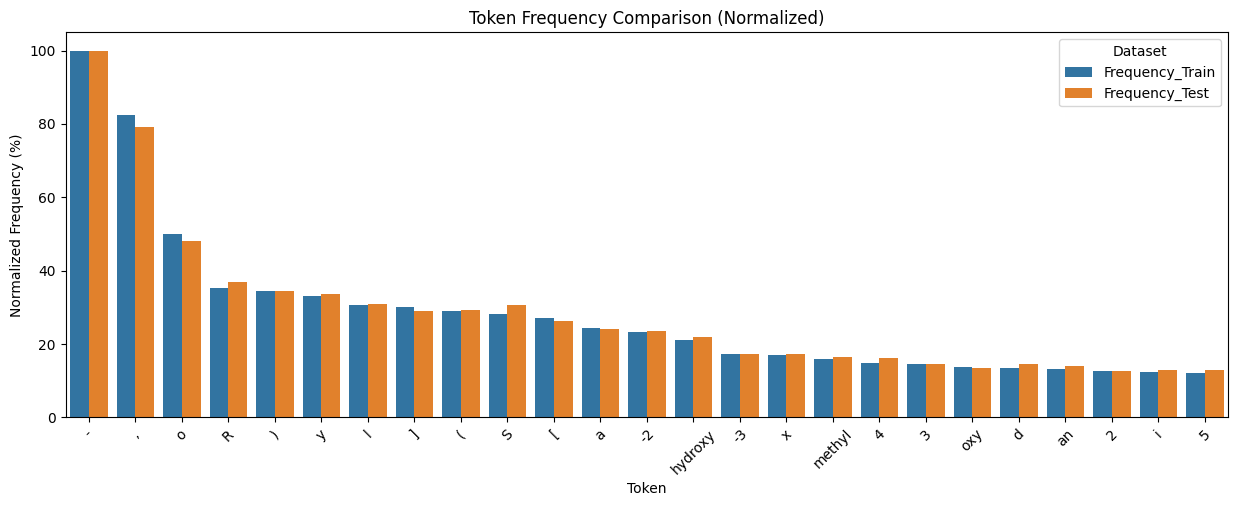

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# 展平标记列表
all_tokens_train = [token for sublist in iupac_cap_train['iupac_tokens'] for token in sublist]
all_tokens_test = [token for sublist in molcap_data['iupac_tokens'] for token in sublist]

# 计算频率
frequency_train = Counter(all_tokens_train)
frequency_test = Counter(all_tokens_test)

# 选取最常见的 N 个标记进行对比
N = 25
common_tokens_train = frequency_train.most_common(N)
common_tokens_test = frequency_test.most_common(N)

# 转换为 DataFrame 以便于可视化
df_train = pd.DataFrame(common_tokens_train, columns=['Token', 'Frequency_Train'])
df_test = pd.DataFrame(common_tokens_test, columns=['Token', 'Frequency_Test'])

# 归一化处理
max_frequency_train = df_train['Frequency_Train'].max()
max_frequency_test = df_test['Frequency_Test'].max()

df_train['Frequency_Train'] = (df_train['Frequency_Train'] / max_frequency_train) * 100
df_test['Frequency_Test'] = (df_test['Frequency_Test'] / max_frequency_test) * 100

# 合并两个 DataFrame 以便于绘图
df_merged = pd.merge(df_train, df_test, on='Token', how='outer')
df_merged = df_merged.fillna(0)  # 填充未出现的标记的频率为0

# 数据重塑以便于绘制并排条形图
df_melted = df_merged.melt(id_vars='Token', var_name='Dataset', value_name='Frequency')

# 绘制并排条形图
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='Token', y='Frequency', hue='Dataset', data=df_melted)
plt.title('Token Frequency Comparison (Normalized)')
plt.xticks(rotation=45)
plt.ylabel('Normalized Frequency (%)')
plt.show()

In [107]:
# 假设 iupac_cap_train 和 molcap_data 是已经加载的 DataFrame

# 创建训练集中所有唯一的 iupac_tokens 集合
train_tokens_set = set(frozenset(tokens) for tokens in iupac_cap_train['iupac_tokens'])

# 定义一个函数，检查一个 tokens 列表是否完全在训练集的 tokens 集合中
def is_subset(tokens):
    return frozenset(tokens) in train_tokens_set

# 应用这个函数来划分 molcap_data
molcap_data['is_subset'] = molcap_data['iupac_tokens'].apply(is_subset)

# 创建两个新的 DataFrame
molcap_data_jinsi = molcap_data[molcap_data['is_subset']]
molcap_data_no_jinsi = molcap_data[~molcap_data['is_subset']]

# 删除辅助列
molcap_data_jinsi = molcap_data_jinsi.drop(columns=['is_subset'])
molcap_data_no_jinsi = molcap_data_no_jinsi.drop(columns=['is_subset'])

In [112]:
print(len(iupac_cap_train))
print(len(iupac_cap_valid))
print(len(molcap_data))
print(len(molcap_data_jinsi))
print(len(molcap_data_no_jinsi))

26406
3300
8415
1386
7029


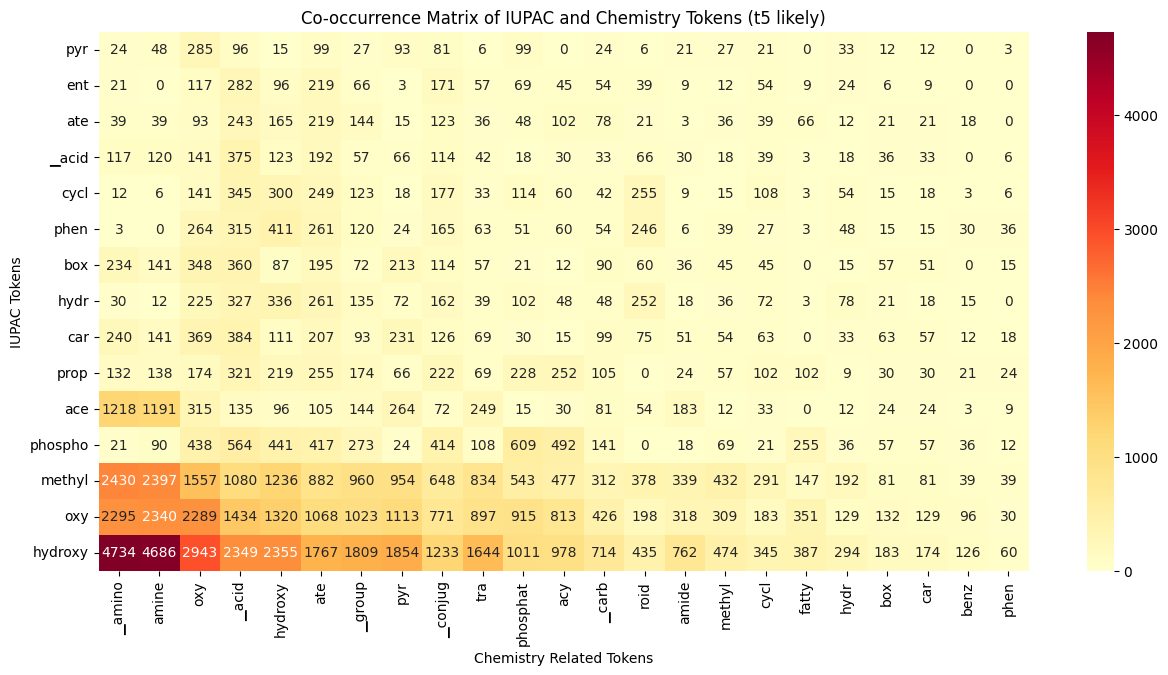

In [114]:
co_occurrence_matrix_t5_jinsi = np.zeros((len(iupac_tokens_1), len(chemistry_related_tokens)))

# 计算共现矩阵
for _, row in molcap_data_jinsi.iterrows():
    for iupac_token in row['iupac_tokens']:
        if iupac_token in iupac_token_to_index:
            for chem_token in row['gt_tokens']:
                if chem_token in chemistry_related_tokens:
                    row_idx = iupac_token_to_index[iupac_token]
                    col_idx = chem_token_to_index[chem_token]
                    co_occurrence_matrix_t5_jinsi[row_idx, col_idx] += 1
                    
co_matrix_df_t5_jinsi = pd.DataFrame(co_occurrence_matrix_t5_jinsi, index=iupac_tokens_1, columns=chemistry_related_tokens)

# Summing the rows and columns
row_sums = co_matrix_df_t5_jinsi.sum(axis=1)
col_sums = co_matrix_df_t5_jinsi.sum(axis=0)

# Sorting the indices by their sums
sorted_row_indices = row_sums.sort_values(ascending=True).index
sorted_col_indices = col_sums.sort_values(ascending=False).index

# Reordering the matrix
reordered_matrix_t5_jinsi = co_matrix_df_t5_jinsi.loc[sorted_row_indices, sorted_col_indices]

# 绘制热图
plt.figure(figsize=(15, 7))
sns.heatmap(reordered_matrix_t5_jinsi, annot=True, fmt="g",
            xticklabels=reordered_matrix_t5_jinsi.columns, yticklabels=reordered_matrix_t5_jinsi.index,
            cmap="YlOrRd")  # 更换为YlOrRd色系
plt.xlabel("Chemistry Related Tokens")
plt.ylabel("IUPAC Tokens")
plt.title("Co-occurrence Matrix of IUPAC and Chemistry Tokens (t5 train-test likely)")
plt.show()

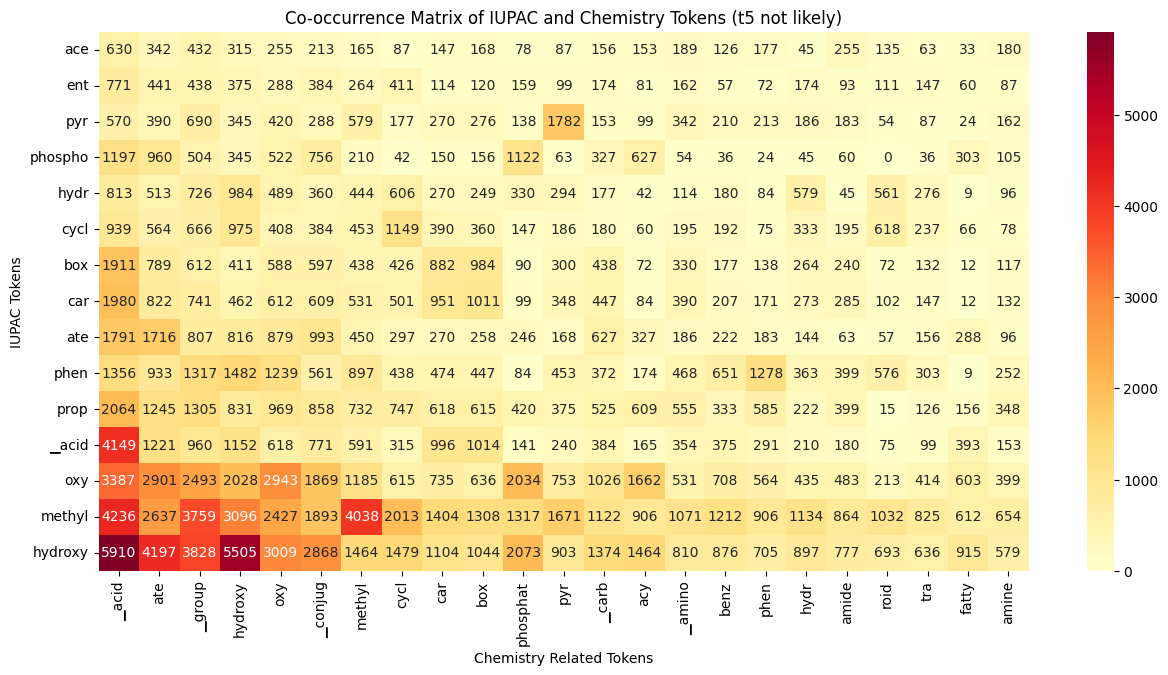

In [116]:
co_occurrence_matrix_t5_no_jinsi = np.zeros((len(iupac_tokens_1), len(chemistry_related_tokens)))

# 计算共现矩阵
for _, row in molcap_data_no_jinsi.iterrows():
    for iupac_token in row['iupac_tokens']:
        if iupac_token in iupac_token_to_index:
            for chem_token in row['gt_tokens']:
                if chem_token in chemistry_related_tokens:
                    row_idx = iupac_token_to_index[iupac_token]
                    col_idx = chem_token_to_index[chem_token]
                    co_occurrence_matrix_t5_no_jinsi[row_idx, col_idx] += 1
                    
co_matrix_df_t5_no_jinsi = pd.DataFrame(co_occurrence_matrix_t5_no_jinsi, index=iupac_tokens_1, columns=chemistry_related_tokens)

# Summing the rows and columns
row_sums = co_matrix_df_t5_no_jinsi.sum(axis=1)
col_sums = co_matrix_df_t5_no_jinsi.sum(axis=0)

# Sorting the indices by their sums
sorted_row_indices = row_sums.sort_values(ascending=True).index
sorted_col_indices = col_sums.sort_values(ascending=False).index

# Reordering the matrix
reordered_matrix_t5_no_jinsi = co_matrix_df_t5_no_jinsi.loc[sorted_row_indices, sorted_col_indices]

# 绘制热图
plt.figure(figsize=(15, 7))
sns.heatmap(reordered_matrix_t5_no_jinsi, annot=True, fmt="g",
            xticklabels=reordered_matrix_t5_no_jinsi.columns, yticklabels=reordered_matrix_t5_no_jinsi.index,
            cmap="YlOrRd")  # 更换为YlOrRd色系
plt.xlabel("Chemistry Related Tokens")
plt.ylabel("IUPAC Tokens")
plt.title("Co-occurrence Matrix of IUPAC and Chemistry Tokens (t5 train-test not likely)")
plt.show()

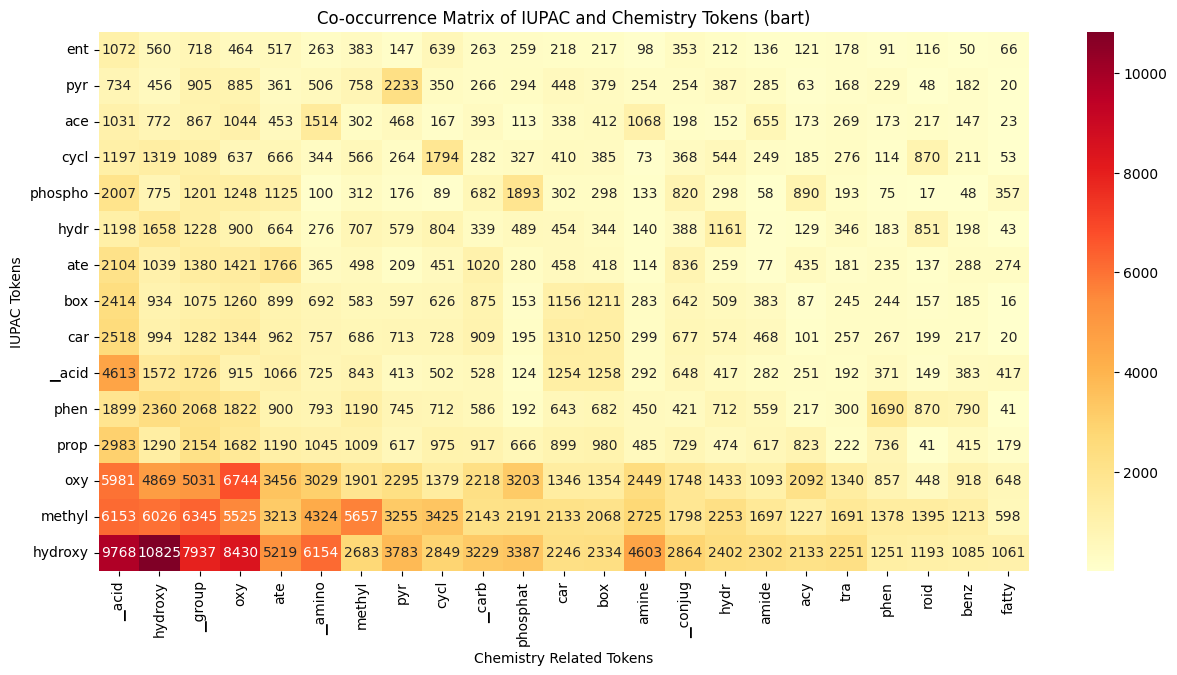

In [163]:
co_occurrence_matrix_bart= np.zeros((len(iupac_tokens_1), len(chemistry_related_tokens)))
molcap_data_bart['iupac_tokens'] = molcap_data_bart['iupac'].apply(lambda x: tokenizer.tokenize(str(x)))
molcap_data_bart['out_tokens'] = molcap_data_bart['out'].apply(lambda x: tokenizer.tokenize(x))
# 计算共现矩阵
for _, row in molcap_data_bart.iterrows():
    for iupac_token in row['iupac_tokens']:
        if iupac_token in iupac_token_to_index:
            for chem_token in row['out_tokens']:
                if chem_token in chemistry_related_tokens:
                    row_idx = iupac_token_to_index[iupac_token]
                    col_idx = chem_token_to_index[chem_token]
                    co_occurrence_matrix_bart[row_idx, col_idx] += 1
                    
co_matrix_df_bart = pd.DataFrame(co_occurrence_matrix_bart, index=iupac_tokens_1, columns=chemistry_related_tokens)

# Summing the rows and columns
row_sums = co_matrix_df_bart.sum(axis=1)
col_sums = co_matrix_df_bart.sum(axis=0)

# Sorting the indices by their sums
sorted_row_indices = row_sums.sort_values(ascending=True).index
sorted_col_indices = col_sums.sort_values(ascending=False).index

# Reordering the matrix
reordered_matrix_bart = co_matrix_df_bart.loc[sorted_row_indices, sorted_col_indices]

# 绘制热图
plt.figure(figsize=(15, 7))
sns.heatmap(reordered_matrix_bart, annot=True, fmt="g",
            xticklabels=reordered_matrix_bart.columns, yticklabels=reordered_matrix_bart.index,
            cmap="YlOrRd")  # 更换为YlOrRd色系
plt.xlabel("Chemistry Related Tokens")
plt.ylabel("IUPAC Tokens")
plt.title("Co-occurrence Matrix of IUPAC and Chemistry Tokens (bart)")
plt.show()

In [193]:
print(reordered_matrix_bart['methyl'].sum())
print(reordered_matrix_bart['▁amino'].sum())

18078.0
20887.0


In [45]:
import pandas as pd
import numpy as np

def find_high_frequency_pairs(df):
    high_freq_pairs = []

    # 遍历DataFrame的每个元素
    for i in range(1, df.shape[0] - 1):
        for j in range(1, df.shape[1] - 1):
            # 提取3x3邻域窗口
            window = df.iloc[i-1:i+2, j-1:j+2]
            center_value = df.iat[i, j]
            mean = window.mean().mean()
            std = window.stack().std()  # 栈式堆叠并计算标准差

            # 设定阈值，例如中心值至少高出平均值加两倍标准差
            if center_value > mean + 2 * std:
                high_freq_pairs.append((df.index[i], df.columns[j], center_value))

    return high_freq_pairs

# 假设co_matrix_df是你的共现DataFrame
high_freq_pairs = find_high_frequency_pairs(co_matrix_df)
print(high_freq_pairs)

[('phen', 'oxy', 1503.0), ('phen', 'phen', 1314.0), ('hydr', 'hydr', 657.0), ('box', 'oxy', 936.0), ('box', 'amine', 258.0), ('cycl', 'cycl', 1257.0), ('cycl', 'hydr', 387.0), ('ate', 'ate', 1935.0), ('ace', 'amine', 1371.0), ('ace', 'amide', 438.0)]


In [56]:
import pandas as pd
import numpy as np

def find_high_frequency_pairs(df, threshold_multiplier):
    high_freq_pairs = []

    for i in range(1, df.shape[0] - 1):
        for j in range(1, df.shape[1] - 1):
            # 比较行标签和列标签的实际值
            if df.index[i] == df.columns[j]:  
                continue

            window = df.iloc[i-1:i+2, j-1:j+2]
            center_value = df.iat[i, j]
            mean = window.mean().mean()
            std = window.stack().std()

            # 使用阈值倍数
            if center_value > mean + threshold_multiplier * std:
                high_freq_pairs.append((df.index[i], df.columns[j], center_value))

    return high_freq_pairs

# 假设co_matrix_df是你的共现DataFrame
# 设置阈值倍数，例如2或3，根据数据特性调整
threshold_multiplier = 1.5
high_freq_pairs_train = find_high_frequency_pairs(reordered_matrix_train, threshold_multiplier)
high_freq_pairs_valid = find_high_frequency_pairs(reordered_matrix_valid, threshold_multiplier)
high_freq_pairs_t5 = find_high_frequency_pairs(reordered_matrix_t5, threshold_multiplier)
high_freq_pairs_test = find_high_frequency_pairs(reordered_matrix, threshold_multiplier)
high_freq_pairs_bart = find_high_frequency_pairs(reordered_matrix_bart, threshold_multiplier)
print(f"train: {high_freq_pairs_train}")
print(f"valid: {high_freq_pairs_valid}")
print(f"test: {high_freq_pairs_test}")
print(f"t5: {high_freq_pairs_t5}")

train: [('ace', '▁amino', 3245.0), ('ace', 'amide', 946.0), ('hydr', 'roid', 2129.0), ('cycl', 'roid', 2282.0), ('car', 'box', 2712.0), ('phen', 'methyl', 2262.0), ('ate', 'acy', 2630.0), ('ate', '▁carb', 2678.0), ('phospho', 'fatty', 4157.0), ('oxy', 'fatty', 6363.0), ('methyl', 'cycl', 7802.0)]
valid: [('ace', '▁amino', 436.0), ('ace', 'amine', 459.0), ('ace', 'amide', 138.0), ('cycl', 'roid', 314.0), ('hydr', 'roid', 290.0), ('car', 'amide', 143.0), ('ate', '▁carb', 340.0), ('phospho', 'acy', 775.0), ('phospho', 'phosphat', 716.0), ('phospho', 'fatty', 531.0), ('phen', 'hydroxy', 747.0), ('▁acid', 'box', 387.0), ('oxy', 'phosphat', 1368.0)]
test: [('ace', '▁amino', 1407.0), ('ace', 'amine', 1371.0), ('hydr', '▁group', 861.0), ('hydr', 'roid', 813.0), ('cycl', 'roid', 873.0), ('phospho', 'ate', 1377.0), ('phospho', '▁conjug', 1170.0), ('phospho', 'phosphat', 1731.0), ('box', 'amide', 276.0), ('ate', '▁conjug', 1116.0), ('car', 'cycl', 564.0), ('car', 'amide', 336.0), ('phen', 'methyl

In [164]:
import pandas as pd

# 假设您已经有了这些reordered_matrix_* 变量和 find_high_frequency_pairs 函数
# thresholds是一个阈值数组
thresholds = [i * 0.2 for i in range(10)]  # 从0到2，以0.2为增幅

thresholds = thresholds+[1.633, 1.666, 1.7, 1.733, 1.766]

# 存储所有数据的列表
all_data = []

for threshold_multiplier in thresholds:
    # 对于每个阈值，获取不同数据集的高频异常对
    high_freq_pairs_train = find_high_frequency_pairs(reordered_matrix_train, threshold_multiplier)
    high_freq_pairs_t5 = find_high_frequency_pairs(reordered_matrix_t5, threshold_multiplier)
    high_freq_pairs_bart = find_high_frequency_pairs(reordered_matrix_bart, threshold_multiplier)
    # 将结果添加到列表中
    all_data.append({'threshold': threshold_multiplier, 'dataset': 'train', 'high_freq_pairs': high_freq_pairs_train})
    #all_data.append({'threshold': threshold_multiplier, 'dataset': 'valid', 'high_freq_pairs': high_freq_pairs_valid})
    all_data.append({'threshold': threshold_multiplier, 'dataset': 't5', 'high_freq_pairs': high_freq_pairs_t5})
    all_data.append({'threshold': threshold_multiplier, 'dataset': 'bart', 'high_freq_pairs': high_freq_pairs_bart})

# 创建DataFrame
df = pd.DataFrame(all_data)

# 显示DataFrame的前几行
print(df.head())

   threshold dataset                                    high_freq_pairs
0        0.0   train  [(ace, oxy, 1623.0), (ace, ▁amino, 3245.0), (a...
1        0.0      t5  [(ace, ▁amino, 1489.0), (ace, amine, 1606.0), ...
2        0.0    bart  [(pyr, ▁group, 905.0), (pyr, oxy, 885.0), (pyr...
3        0.2   train  [(ace, ▁amino, 3245.0), (ace, amine, 3424.0), ...
4        0.2      t5  [(ace, ▁amino, 1489.0), (ace, amine, 1606.0), ...


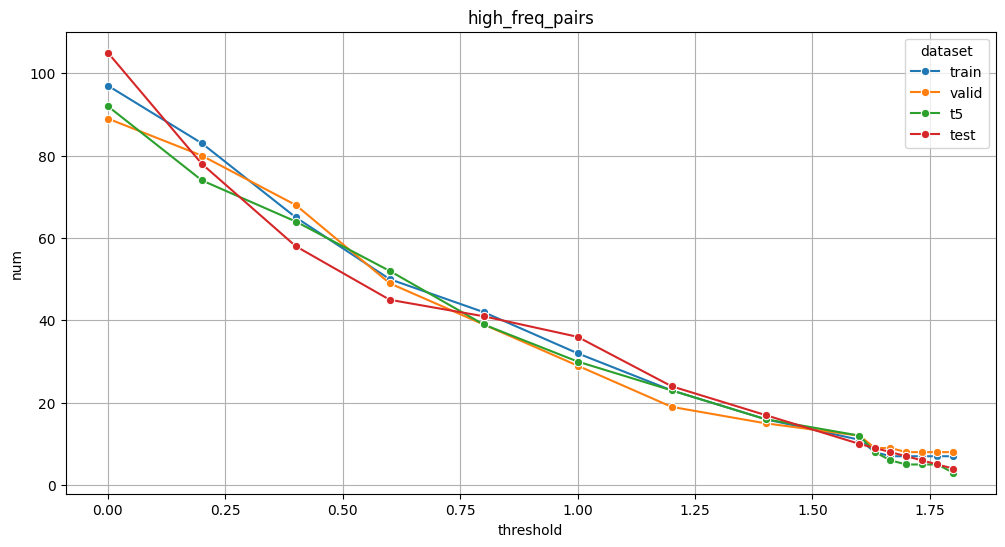

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设df是您之前创建的包含所有信息的DataFrame

# 计算每个阈值和数据集下的高频共现对数量
df['pair_count'] = df['high_freq_pairs'].apply(len)

# 创建折线图
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='threshold', y='pair_count', hue='dataset', marker='o')

plt.title('high_freq_pairs')
plt.xlabel('threshold')
plt.ylabel('num')
plt.legend(title='dataset')
plt.grid(True)
plt.show()

In [165]:
data_for_new_df = []

# 遍历原始DataFrame
for index, row in df.iterrows():
    threshold = row['threshold']
    dataset = row['dataset']
    pairs = row['high_freq_pairs']  # 假设是形如[(iupac_token, caption_token, value), ...]的列表

    for pair in pairs:
        iupac_token, caption_token, value = pair
        # 添加到新DataFrame的数据列表中
        data_for_new_df.append({'threshold': threshold, 'dataset': dataset, 
                                'iupac_token': iupac_token, 'caption_token': caption_token, 
                                'value': value})

# 构建新的DataFrame
new_df = pd.DataFrame(data_for_new_df)

# 显示新DataFrame的前几行
print(new_df.head())

   threshold dataset iupac_token caption_token   value
0        0.0   train         ace           oxy  1623.0
1        0.0   train         ace        ▁amino  3245.0
2        0.0   train         ace         amine  3424.0
3        0.0   train         ace           box   636.0
4        0.0   train         ace           tra   826.0


In [84]:
dataset_combinations = [
    'None','train', 'valid', 't5', 'test', 'train+valid', 'train+t5', 'train+test', 'valid+t5',
    'valid+test', 't5+test', 'train+valid+t5', 'train+valid+test', 'train+t5+test',
    'valid+t5+test', 'train+valid+t5+test'
]

color_list = ['#FFFFFF', '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF',
              '#C0C0C0', '#808080', '#800000', '#808000', '#008000', '#800080',
              '#008080', '#000080', '#FFA500']

# 使用自定义的color map
cmap = mpl.colors.ListedColormap(color_list[:len(dataset_combinations)])

# 创建一个标准化对象，用于确保colorbar上颜色的正确映射
norm = mpl.colors.BoundaryNorm(np.arange(-0.5, len(dataset_combinations) + 0.5), cmap.N)


In [172]:
new_df['dataset']

0       train
1       train
2       train
3       train
4       train
        ...  
1343     bart
1344     bart
1345     bart
1346     bart
1347     bart
Name: dataset, Length: 1348, dtype: object

In [85]:
import pandas as pd
import numpy as np

# 创建一个空的共现矩阵
unique_iupac = new_df['iupac_token'].unique()
unique_caption = new_df['caption_token'].unique()
co_occurrence_matrix = pd.DataFrame(0, index=unique_iupac, columns=unique_caption)

# 筛选阈值为0.0的数据
df_0 = new_df[new_df['threshold'] == 1.8]

# 填充矩阵
for _, row in df_0.iterrows():
    iupac_token = row['iupac_token']
    caption_token = row['caption_token']
    dataset = row['dataset']
    # 使用位运算符来编码数据集组合
    dataset_code = {'train': 1, 'valid': 2, 't5': 4, 'test': 8}
    co_occurrence_matrix.at[iupac_token, caption_token] |= dataset_code[dataset]

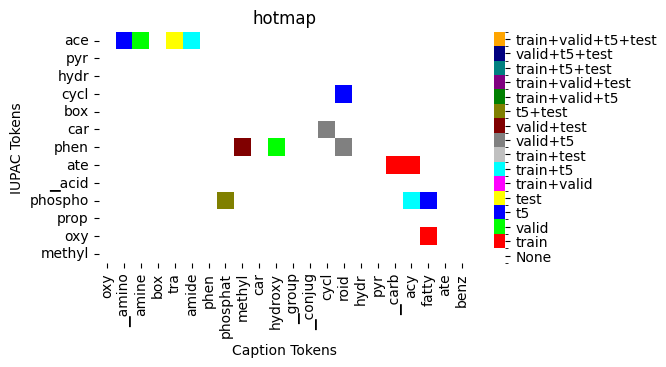

In [88]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制热图
plt.figure(figsize=(6, 3))
ax = sns.heatmap(co_occurrence_matrix, cmap=cmap, norm=norm, cbar_kws={"ticks": np.arange(len(dataset_combinations))})

# 创建colorbar标签
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels(dataset_combinations)

plt.title('hotmap')
plt.xlabel('Caption Tokens')
plt.ylabel('IUPAC Tokens')
plt.show()

In [173]:
import pandas as pd

# 假设new_df是包含所有信息的DataFrame

thresholds = [i * 0.2 for i in range(10)]  # 从0到1.8，以0.2为增幅

thresholds = thresholds+[1.633, 1.666, 1.7, 1.733, 1.766]

# 初始化字典来存储每个阈值的共现矩阵
co_occurrence_matrices = {}

# 遍历每个阈值
for threshold in thresholds:
    # 筛选特定阈值的数据
    df_threshold = new_df[(new_df['threshold'] == threshold) & 
                          (new_df['dataset'].isin(['train', 't5', 'bart']))]

    # 创建一个空的共现矩阵
    unique_iupac = df_threshold['iupac_token'].unique()
    unique_caption = df_threshold['caption_token'].unique()
    co_occurrence_matrix = pd.DataFrame(0, index=unique_iupac, columns=unique_caption)

    # 填充共现矩阵
    for _, row in df_threshold.iterrows():
        iupac_token = row['iupac_token']
        caption_token = row['caption_token']
        dataset = row['dataset']
        # 使用位运算符来编码数据集组合
        dataset_code = {'train': 1, 't5': 2, 'bart': 4}  # 只考虑train, t5 , bart
        co_occurrence_matrix.at[iupac_token, caption_token] |= dataset_code[dataset]

    # 将共现矩阵存储在字典中
    co_occurrence_matrices[threshold] = co_occurrence_matrix

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

# 设置图表大小和分辨率
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(22, 11), dpi=600)  # 增加 dpi 参数

# 使用渐变色图
cmap = mpl.cm.plasma

# 数据集组合的含义
dataset_combinations = {
    0: 'None',
    1: 'Train',
    2: 'T5',
    3: 'Train+T5',
    4: 'Bart',
    5: 'Train+Bart',
    6: 'T5+Bart',
    7: 'Train+T5+Bart'
}

# 计算共现矩阵中的最大值
max_value = max(matrix.to_numpy().max() for matrix in co_occurrence_matrices.values())

# 确保最大值至少为3
max_value = max(max_value, 7)

# 创建一个标准化对象
norm = mpl.colors.BoundaryNorm(np.arange(-0.5, max_value + 1.5), cmap.N)

# 绘制每个阈值的热图
for i, ax in enumerate(axes.flatten()):
    threshold = thresholds[i]
    sns.heatmap(co_occurrence_matrices[threshold], cmap=cmap, norm=norm, cbar=False, ax=ax)
    ax.set_title(f'Threshold {threshold:.2f}')
    ax.set_xlabel('Caption Tokens')
    ax.set_ylabel('IUPAC Tokens')

# 创建一个额外的轴用于显示图例
cbar_ax = fig.add_axes([0.93, 0.3, 0.02, 0.4])

# 为这个额外的轴添加colorbar
mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, 
                          ticks=np.arange(max_value + 1), 
                          orientation='vertical')

# 设置图例标签
cbar_ax.set_yticklabels([dataset_combinations.get(i, '') for i in range(max_value + 1)]) 

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()

/tmp/ipykernel_40054/3736465179.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


In [175]:
co_occurrence_matrices[1.633]

,▁amino,amide,roid,methyl,acy,▁carb,fatty,amine,tra,hydroxy,phosphat
ace,5,7,0,0,0,0,0,6,2,0,0
cycl,0,0,5,0,0,0,0,0,0,0,0
phen,0,0,0,1,0,0,0,0,0,0,0
ate,0,0,0,0,1,1,0,0,0,0,0
phospho,0,0,0,0,6,0,1,0,0,0,6
oxy,0,0,0,0,2,0,1,0,0,0,4
hydr,0,0,6,4,0,0,0,0,0,2,0


In [176]:
co_occurrence_matrices[1.666]

,▁amino,roid,methyl,acy,▁carb,fatty,amine,tra,amide,phosphat
ace,5,0,0,0,0,0,6,2,6,0
cycl,0,5,0,0,0,0,0,0,0,0
phen,0,0,1,0,0,0,0,0,0,0
ate,0,0,0,1,1,0,0,0,0,0
phospho,0,0,0,6,0,1,0,0,0,6
oxy,0,0,0,2,0,1,0,0,0,4
hydr,0,4,4,0,0,0,0,0,0,0


In [182]:
# 假设co_occurrence_matrices[1.666]是我们的目标DataFrame
matrix = co_occurrence_matrices[1.666]

# 初始化两个list来存储结果
list_value_1 = []  # 存储值为1的组合
list_value_2 = []  # 存储值为2的组合
list_value_4 = [] 
list_value_5 = [] 
list_value_6 = [] 
# 遍历DataFrame
for iupac_token in matrix.index:
    for caption_token in matrix.columns:
        value = matrix.at[iupac_token, caption_token]
        if value == 1:
            list_value_1.append((iupac_token, caption_token))
        elif value == 2:
            list_value_2.append((iupac_token, caption_token))
        elif value == 4:
            list_value_4.append((iupac_token, caption_token))
        elif value == 5:
            list_value_5.append((iupac_token, caption_token))
        elif value == 6:
            list_value_6.append((iupac_token, caption_token))
# list_value_1 和 list_value_2 现在包含了所需的组合


In [183]:
print(list_value_1+list_value_5) #train
print(list_value_2) #t5
print(list_value_4) #bart
print(list_value_6) #t5+bart

[('phen', 'methyl'), ('ate', 'acy'), ('ate', '▁carb'), ('phospho', 'fatty'), ('oxy', 'fatty'), ('ace', '▁amino'), ('cycl', 'roid')]
[('ace', 'tra'), ('oxy', 'acy')]
[('oxy', 'phosphat'), ('hydr', 'roid'), ('hydr', 'methyl')]
[('ace', 'amine'), ('ace', 'amide'), ('phospho', 'acy'), ('phospho', 'phosphat')]
